# Kuy Production Summary Statistics
Here we explore the descriptive data

---
# Contents
---
- [Vowel durations](#Vowel-durations)
- [Vowel f0](#Vowel-f0)
- [f0 by onset and register](#f0-by-onset-and-register)
- [f0 by rhyme and register](#f0-by-rhyme-and-register)

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
import seaborn as sns

sns.set(font_scale = 1.5, style = 'whitegrid')
sns.plotting_context(rc={"grid.linewidth": 0.5})

{'font.size': 18.0,
 'axes.labelsize': 18.0,
 'axes.titlesize': 18.0,
 'xtick.labelsize': 16.5,
 'ytick.labelsize': 16.5,
 'legend.fontsize': 16.5,
 'axes.linewidth': 1.25,
 'grid.linewidth': 0.5,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 1.25,
 'ytick.major.width': 1.25,
 'xtick.minor.width': 1.0,
 'ytick.minor.width': 1.0,
 'xtick.major.size': 6.0,
 'ytick.major.size': 6.0,
 'xtick.minor.size': 4.0,
 'ytick.minor.size': 4.0,
 'legend.title_fontsize': 18.0}

In [2]:
df = pd.read_csv('../0_data/kuy-production-clean.csv')

# Get age from demographics
df = df.merge(pd.read_csv('../0_data/kuy-production-dem.csv')[['sp', 'age']], on = 'sp')

# Add generation
df['generation'] = df['age'].apply(lambda a: 'younger' if a < 45 else 'older')

# Merge with stimuli
stim = pd.read_csv('../0_data/kuy-production-stimuli.csv').fillna('')

coda_to_type = {'none':r'-$\emptyset$/-N', 
                'ŋ':r'-$\emptyset$/-N', 'm':r'-$\emptyset$/-N', 'n':r'-$\emptyset$/-N', 'l':r'-$\emptyset$/-N',
                'ʔ':'-ʔ',
                'h':'-h',
                'p':'T', 't':'T'}

# Group onsets and codas
stim['onset_type'] = stim['onset'].apply(lambda o: 'fricative' if o[0] == 's' else ('sonorant' if o[0] == 'l' else 'stop'))
stim['coda_type'] = stim['coda'].map(coda_to_type)
stim['Onset & Register'] = (stim['onset_type'] + ' (' + stim['aspiration'] + '), ' + stim['register']).str.replace(' ()', '', regex = False)
stim['Rhyme or Coda'] = stim.apply(lambda row: '-V:' + row['coda_type'] if ((row['vowelqual'][-1] == ':') & (row['coda_type'] == 'T'))
                                   else ('-V' + row['coda_type'] if row['coda_type'] == 'T' else row['coda_type']), axis = 1)

# Merge
stim_cols = stim[['word', 'vowelqual', 'Onset & Register', 'Rhyme or Coda']].rename(columns = {'vowelqual':'ipa'})

df = df.merge(stim_cols, on = 'word')

---
# Vowel durations
---
- [Contents](#Contents)
- [Vowel f0](#Vowel-f0)
- [f0 by onset and register](#f0-by-onset-and-register)
- [f0 by rhyme and register](#f0-by-rhyme-and-register)

In [3]:
df.groupby(['Filename', 'ipa', 'register']).duration.mean().groupby(['ipa', 'register']).agg(['mean', 'std', 'count']).sort_values(by = 'ipa')

mean         std  count
ipa register                               
a   breathy   140.618782   44.901183    648
    modal     116.158879   36.288444    639
e:  breathy   305.166303   98.415514    211
    modal     301.619395  107.047545    228
i:  breathy   277.712739  111.063089    429
    modal     263.421803  105.835216    447
o:  breathy   214.744233   67.830800    430
    modal     201.234439   64.599011    440
u:  breathy   211.505905  114.431735    733
    modal     235.943635  101.801233    718
ɑ   breathy   106.031395   22.611687     38
    modal      89.257833   20.180298     48
ɛ:  breathy   200.847709   62.779871     55
    modal     202.156803   65.831545     61

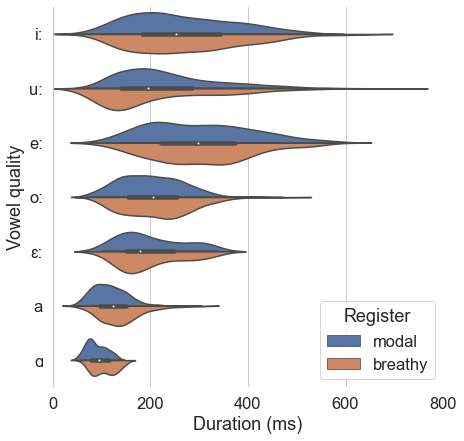

In [4]:
# Plot duration by vowel quality
plt.figure(figsize = (7, 7))

sns.violinplot(data = df.groupby(['Filename', 'ipa', 'register']).duration.mean().reset_index(),
               x = 'duration',
               y = 'ipa',
               order = ['i:', 'u:', 'e:', 'o:', 'ɛ:', 'a', 'ɑ'],
               hue = 'register',
               hue_order = ['modal', 'breathy'],
               split = True)

plt.xlabel('Duration (ms)')
plt.ylabel('Vowel quality')
plt.xlim(0, 800)
plt.legend(title = 'Register')

sns.despine(bottom = True)

plt.savefig('vdur.png', dpi = 300, bbox_inches = 'tight')

---
# Vowel f0, H1*-H2*, and F1
---
- [Contents](#Contents)
- [Vowel f0](#Vowel-f0)
- [f0 by onset and register](#f0-by-onset-and-register)
- [f0 by rhyme and register](#f0-by-rhyme-and-register)

In [5]:
# Summarize differences by vowel quality
df.groupby(['ipa', 'register'])[['f0', 'H1H2c', 'F1']].mean().round(2).sort_index(level = 'register', ascending = False).unstack(['register'])

f0           H1H2c            F1        
register breathy   modal breathy modal breathy   modal
ipa                                                   
a         161.99  170.28    7.99  5.91  881.34  926.32
e:        161.34  167.92    9.41  8.66  428.26  450.10
i:        169.16  174.96    9.95  8.08  350.11  387.54
o:        166.46  175.17   10.42  7.90  424.19  470.91
u:        170.98  179.95    9.55  8.51  351.00  379.53
ɑ         184.38  192.15    8.69  6.55  649.68  703.97
ɛ:        167.80  176.86    8.05  5.58  567.13  600.81

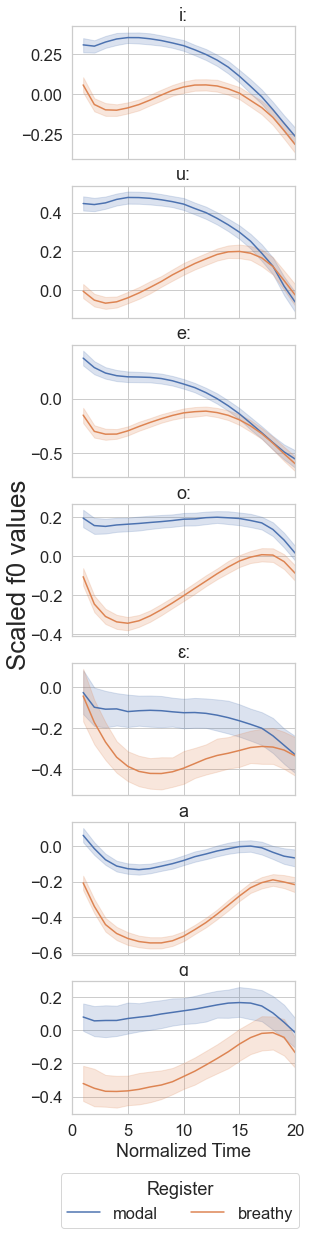

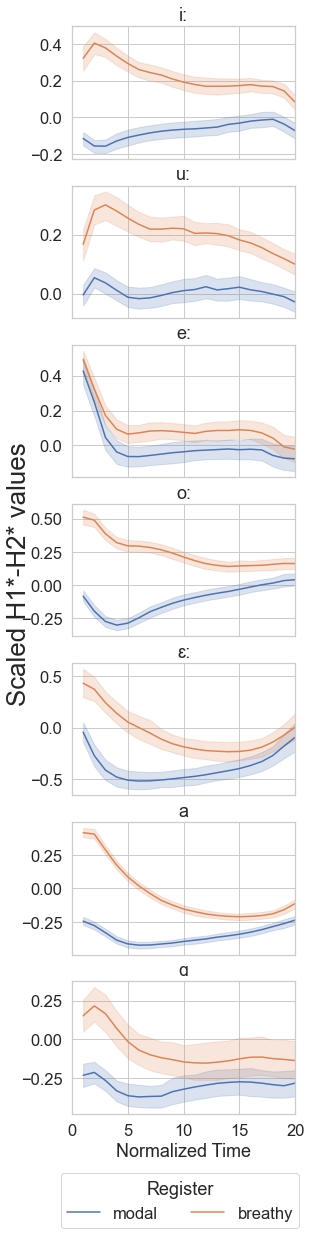

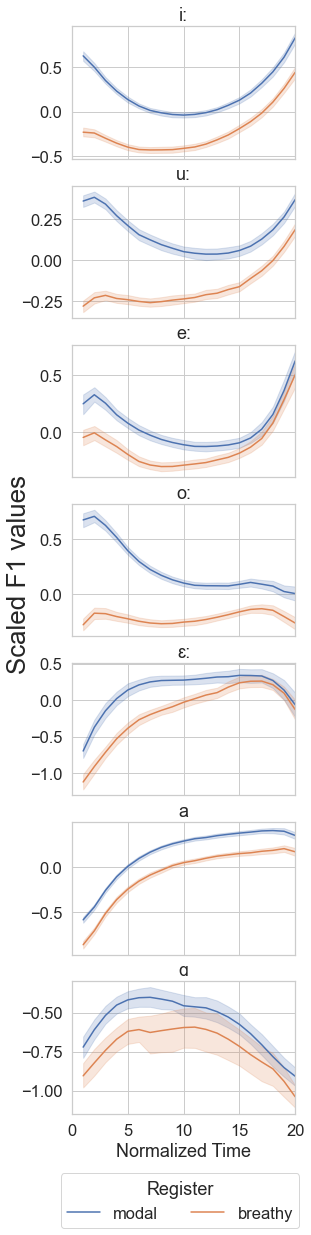

In [6]:
# Plot differences for each vowel quality
vowels = ['i:', 'u:', 'e:', 'o:', 'ɛ:', 'a', 'ɑ']

for m in ['f0', 'H1H2c', 'F1']:
    
    fig, axes = plt.subplots(nrows = len(vowels), figsize = (4, 20))
    
    for i, v in enumerate(vowels):

        ax = axes.flat[i]

        g = sns.lineplot(data = df.query('ipa == @v'), x = 'time', 
                         y = m + '_scaled', hue = 'register', hue_order = ['modal', 'breathy'], ax = ax,
                         legend = True)

        ax.set(title = v, xlim = (0, 20), xticks = np.arange(0, 20.0001, 5))

        if i == 6:
            ax.set(xlabel = 'Normalized Time')
            
        else:
            ax.set(xlabel = None)
            ax.xaxis.set_ticklabels([])
    
        ax.set(ylabel = None)
    
    if m == 'H1H2c':
        fig.supylabel('Scaled H1*-H2* values', fontsize = 'x-large', x = -0.1)
        
    else:
        fig.supylabel('Scaled ' + m + ' values', fontsize = 'x-large', x = -0.1)

    # Add legend at bottom and remove legends in graphs
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, title = 'Register', loc='lower center', ncol = 2, bbox_to_anchor=(0.5, 0.04))
        
    [ax.get_legend().remove() for ax in axes.flat]
    
    plt.savefig('vowel' + m + '.png', dpi = 300, bbox_inches = 'tight')